In [27]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# Data

In [34]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dim
img_rows, img_cols = 28, 28

# allocate data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Display some images

In [35]:
print('Image data type: ', type(x_train[0]))
print('Shape of train image: ', x_train[0].shape)

Image data type:  <class 'numpy.ndarray'>
Shape of train image:  (28, 28, 1)


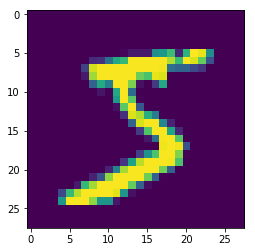

In [36]:
plt.figure()
plt.imshow(x_train[0].squeeze())
plt.grid(False)
plt.show()

### Normalize image

In [37]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## One-hot encoding

In [38]:
y_train_bin = to_categorical(y_train)
y_test_bin = to_categorical(y_test)

print(y_train_bin[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Network architect

In [39]:
model = Sequential()
model.add(Conv2D(6, (5, 5), strides=1, activation='relu', input_shape=input_shape))
model.add(AveragePooling2D(strides=2))

model.add(Conv2D(16, (5, 5), strides=1, activation='relu'))
model.add(AveragePooling2D(strides=2))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Training

In [41]:
model.fit(x_train, y_train_bin,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 270us/sample - loss: 0.5355 - acc: 0.8261 - val_loss: 0.1450 - val_acc: 0.9540
Epoch 2/12
60000/60000 [==============================] - 15s 258us/sample - loss: 0.2021 - acc: 0.9385 - val_loss: 0.0811 - val_acc: 0.9736
Epoch 3/12
60000/60000 [==============================] - 16s 267us/sample - loss: 0.1502 - acc: 0.9548 - val_loss: 0.0596 - val_acc: 0.9804
Epoch 4/12
60000/60000 [==============================] - 16s 269us/sample - loss: 0.1257 - acc: 0.9629 - val_loss: 0.0530 - val_acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 16s 268us/sample - loss: 0.1114 - acc: 0.9667 - val_loss: 0.0469 - val_acc: 0.9852
Epoch 6/12
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1023 - acc: 0.9692 - val_loss: 0.0413 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0923 - acc: 0.9729 

### Save model

In [42]:
keras.models.save_model(
    model,
    'leNet5',
    overwrite=True,
    include_optimizer=True
)